#**Scraping the Reviews and Feature data**

####Product: Panasonics ac 1.5 ton 3 star rated
####Site: Flikart


*   Importing Libraries
*   Exctracting the Data
*   Constructing a Dataframe  






##Importing Libraries

In [ ]:
#Required Framework Beutiful Soup , Requests
#Step 1 : Importing all the required libraries
import requests
import pandas as pd
from bs4 import BeautifulSoup

In [ ]:
url='https://www.flipkart.com/panasonic-convertible-7-in-1-additional-ai-mode-cooling-2023-model-1-5-ton-3-star-split-inverter-2-way-swing-pm-0-1-air-purification-filter-ac-wi-fi-connect-white/product-reviews/itm690062d929416?pid=ACNGHHH24J62PGNV&lid=LSTACNGHHH24J62PGNVODJGXG&marketplace=FLIPKART'

##Exctracting the Data


In [ ]:
#Step 2 : Using Soup and knowledge of HTML tags retriving the desired data

Product_rating = []
Product_summary = []
Product_review = []
Product_location = []
Product_date = []
Product_review_upvotes = []
Product_review_downvotes = []
SAMPLE_URL = url
for i in range(2,222):
    #updating urls for every page
    url=str(SAMPLE_URL) + "&page="+ str(i)
    r = requests.get(SAMPLE_URL)
    soup = BeautifulSoup(r.content, 'html.parser')
    print("Scraping Started.......")
    print("page no:",i)

    #getting review class from page
    no_reviews = soup.find_all('div',attrs={'class':'col _2wzgFH K0kLPL'})
    print(f"Count of no_reviews:{len(no_reviews)}\n\n")
    for row in no_reviews:

        sub_row = row.find_all('div',attrs={'class':'row'})
        rating = sub_row[0].find('div').text
        Product_rating.append(rating)

        summary = sub_row[0].find('p').text
        Product_summary.append(summary)

        review = sub_row[1].find_all('div')[2].text
        Product_review.append(review)

        location = sub_row[3].find('p',attrs={'class':'_2mcZGG'}).find_all('span')[1].text
        location = "".join(location.split(",")[1:]).strip()
        Product_location.append(location)

        date = sub_row[3].find_all('p',attrs={'class':'_2sc7ZR'})[1].text
        Product_date.append(date)

        sub_row_2 = row.find_all('div',attrs={'class':'_1e9_Zu'})[0].find_all('span',attrs={'class':'_3c3Px5'})

        upvotes = sub_row_2[0].text
        Product_review_upvotes.append(upvotes)

        downvotes = sub_row_2[1].text
        Product_review_downvotes.append(downvotes)

##Constructing a Dataframe

In [ ]:
#Step 3 : Writing the lists of data into data frame
df_reviews = pd.DataFrame(list(zip(Product_rating,
Product_summary,
Product_review,
Product_location,
Product_date,
Product_review_upvotes,
Product_review_downvotes )),
columns =['Rating', 'Review Summary','Review','Reviewing Location','Review Date','Review Upvotes','Review Downvotes'])

#**Data Cleaning.**

*   Checking Null Value
*   Formating
*   Pre-processing
*   Tokenisation
*   Stop Word Removal








##Checking Null value

In [ ]:
#Step 1 : Checking Null values
df_reviews.isnull().sum()


##Formating

In [ ]:
#Step 2 : Formating the data
#Here month year column needs to be formated

#Converting "N months ago" month year to "Month , Year" format

def convert_months_ago_to_month_year(entry):
    if "months ago" in entry:
        months_ago = int(entry.split()[0])
        current_date = datetime.now()
        new_date = current_date - timedelta(days=months_ago * 30)  # Approximation for months
        return new_date.strftime('%b %Y')
    else:
        return entry

rev_date=df_reviews['Review Date']
updated_date = [convert_months_ago_to_month_year(entry) for entry in rev_date]
df_reviews['Review Date']=updated_date

##Pre-processing , Tokenisation and Stop Word Removel

In [ ]:
#Step 3,4,5: Preprocess the review
def preprocess_review(review):
    # Remove punctuation and convert to lowercase
    review = review.lower()
    review = ''.join([char for char in review if char.isalnum() or char.isspace()])

    # Tokenize the review into individual words
    tokens = word_tokenize(review)

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]

    return tokens

#**Sentimental Analaysis**

*   Importing Libraries




*   Getting Sentiental score using VADER (Valence Aware Dictionary for sEntiment Reasoning)

*   Analyse sentiment distribution

*   Assigning satisfaction Class by Sentiment Compound Score
*   Validating Rating Authenticy


*   Extracting Key Positive words and Plotting using wordcloud


*   Extracting key Negative words and Plotting using wordcloud

##Importing Libraries

In [ ]:
#Step 1 importing all the libraries
import pandas as pd
import numpy as np
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

from datetime import datetime, timedelta
from collections import Counter
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.sentiment import SentimentIntensityAnalyzer

In [ ]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('vader_lexicon')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [ ]:
#Importing the data to skip the scraping and cleaning process over again
df_reviews = pd.read_csv('/content/Panasonic.csv')
reviews=df_reviews["Review"]
del df_reviews['Unnamed: 0']
df_reviews.head()

,Rating,Review Summary,Review,Reviewing Location,Review Date,Review Upvotes,Review Downvotes
0,4,Value-for-money,It was an excellent ac for 150 sqft room. Cool...,Nandivaram Guduvancheri,"Feb, 2022",66,8
1,5,Terrific purchase,Best cooling capacity of this product,Pakbara,"Jun, 2021",45,5
2,5,Just wow!,Delivery was smooth within 5 Days . The day i ...,Medinipur,"Apr, 2021",581,151
3,5,Great product,This AC is quite good. Some of the really good...,Kolkata,5 months ago,12,0
4,5,Worth every penny,If Ac dosent have powerful Airflow its not wor...,Amritsar,"Apr, 2022",18,1


##Getting Sentiental score using VADER (Valence Aware Dictionary for sEntiment Reasoning)


In [ ]:
#Step 1 : Perform sentiment analysis and adding sentimental scores as new coulmns
sentiment_compound_score=[]
sentiment_pos_score=[]
sentiment_neg_score=[]

sentiment_of_review=[]

for review in reviews:
    tokens = preprocess_review(review)
    analyzer = SentimentIntensityAnalyzer()
    sentiment_factor = analyzer.polarity_scores(' '.join(tokens))
    compound_score = sentiment_factor['compound']
    if compound_score >= 0.05:
        sentiment = 'Positive'
    elif compound_score <= -0.05:
        sentiment = 'Negative'
    else:
        sentiment = 'Neutral'

    sentiment_pos_score.append(sentiment_factor['pos'])
    sentiment_neg_score.append(sentiment_factor['neg'])
    sentiment_compound_score.append(sentiment_factor['compound'])
    sentiment_of_review.append(sentiment)

df_reviews['Sentiment Compund Score']=sentiment_compound_score
df_reviews['Sentiment Positve Score']=sentiment_pos_score
df_reviews['Sentiment Negative Score']=sentiment_neg_score
df_reviews['Review Sentiment']=sentiment_of_review
df_reviews.head(-10)

##Analyse Sentiment Distribution

 0.7906    221
 0.6369    221
 0.9477    221
 0.9761    221
 0.9062    221
 0.8979    221
-0.5719    221
 0.9661    221
 0.4215    221
 0.7003    221
Name: Sentiment Compund Score, dtype: int64


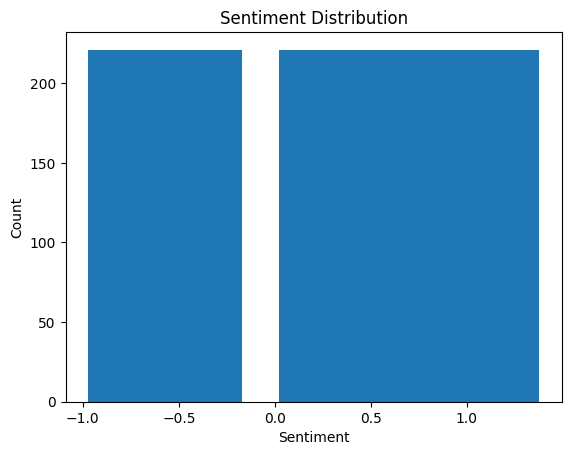

In [ ]:
#Step 2 : Analysing the distrubution of sentiment with respect number of reviews
sentiment_counts = df_reviews['Sentiment Compund Score'].value_counts()
print(sentiment_counts)
plt.bar(sentiment_counts.index, sentiment_counts.values)
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Sentiment Distribution')
plt.show()


##Assigning Satisfaction Class by Sentiment Compound Score

In [ ]:
#Step 3 : Classifying the satisfaction rate by sentiment of the reviwer
# Defining a function to calculate the satisfaction of customer

rev_score = df_reviews['Sentiment Compund Score']
satisfaction_class = []

# Define a function to classify reviews
def classify_satisfaction(rev_score):

    compound_score = rev_score
    if compound_score >= 0.49:
        return "Very Satisfied"
    elif compound_score >= 0.1:
        return "Satisfied"
    elif compound_score > -0.05:
        return "Neutral"
    elif compound_score > -0.49:
        return "Not Satisfied"
    else:
        return "Very Not Satisfied"


for rev in rev_score:
  score=classify_satisfaction(rev)
  satisfaction_class.append(score)

# Add the satisfaction scores to the DataFrame
df_reviews['Satisfaction Class'] = satisfaction_class
df_reviews.head(-10)

,Rating,Review Summary,Review,Reviewing Location,Review Date,Review Upvotes,Review Downvotes,Sentiment Compund Score,Sentiment Positve Score,Sentiment Negative Score,Review Sentiment,Satisfaction Class
0,4,Value-for-money,It was an excellent ac for 150 sqft room. Cool...,Nandivaram Guduvancheri,"Feb, 2022",66,8,0.7906,0.161,0.000,Positive,Very Satisfied
1,5,Terrific purchase,Best cooling capacity of this product,Pakbara,"Jun, 2021",45,5,0.6369,0.583,0.000,Positive,Very Satisfied
2,5,Just wow!,Delivery was smooth within 5 Days . The day i ...,Medinipur,"Apr, 2021",581,151,0.9477,0.310,0.000,Positive,Very Satisfied
3,5,Great product,This AC is quite good. Some of the really good...,Kolkata,May 2023,12,0,0.9761,0.389,0.000,Positive,Very Satisfied
4,5,Worth every penny,If Ac dosent have powerful Airflow its not wor...,Amritsar,"Apr, 2022",18,1,0.9062,0.442,0.059,Positive,Very Satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...
2195,4,Very Good,"Very good one, Chills my 120 Square feet room ...",Thane,"Dec, 2021",22,2,0.8979,0.304,0.046,Positive,Very Satisfied
2196,1,Unsatisfactory,Very bad installation by the team... The indoo...,Bengaluru,"Apr, 2021",34,5,-0.5719,0.080,0.266,Negative,Very Not Satisfied
2197,5,Super!,"Excellent cooling, minimal noise, and amazing ...",Sonipat,"Jun, 2022",15,0,0.9661,0.729,0.000,Positive,Very Satisfied
2198,5,Excellent,Very Nice. Go for it👌,North 24 Parganas,Jun 2023,33,5,0.4215,0.737,0.000,Positive,Satisfied


## Validating Rating Authenticy
Using upvotes and downvotes column to generate facts to prove authenticity.
Where Valid rating 1 means Valid , 2 means Invalid and 0 means Neutral.

In [ ]:
#Step 4 : To list out fake reviews doing the feature engineering to add valid rating column

df_reviews['Review Length'] = df_reviews['Review'].str.len()
#Count the number of upvotes and downvotes for each review and calculate the ratio of upvotes to total votes, creating a new column 'Upvote Ratio'.
df_reviews['Upvote Ratio'] = df_reviews['Review Upvotes'] / (df_reviews['Review Upvotes'] + df_reviews['Review Downvotes'])
df_reviews['Downvotes Ratio'] = df_reviews['Review Downvotes'] / (df_reviews['Review Upvotes'] + df_reviews['Review Downvotes'])

df_reviews['Valid rating'] = df_reviews.apply(lambda x: 1 if x['Upvote Ratio'] > x['Downvotes Ratio'] else (2 if x['Upvote Ratio'] < x['Downvotes Ratio'] else 0), axis=1)
df_reviews.head(-10)

,Rating,Review Summary,Review,Reviewing Location,Review Date,Review Upvotes,Review Downvotes,Sentiment Compund Score,Sentiment Positve Score,Sentiment Negative Score,Review Sentiment,Satisfaction Class,Review Length,Upvote Ratio,Downvotes Ratio,Valid rating
0,4,Value-for-money,It was an excellent ac for 150 sqft room. Cool...,Nandivaram Guduvancheri,"Feb, 2022",66,8,0.7906,0.161,0.000,Positive,Very Satisfied,498,0.891892,0.108108,1
1,5,Terrific purchase,Best cooling capacity of this product,Pakbara,"Jun, 2021",45,5,0.6369,0.583,0.000,Positive,Very Satisfied,37,0.900000,0.100000,1
2,5,Just wow!,Delivery was smooth within 5 Days . The day i ...,Medinipur,"Apr, 2021",581,151,0.9477,0.310,0.000,Positive,Very Satisfied,429,0.793716,0.206284,1
3,5,Great product,This AC is quite good. Some of the really good...,Kolkata,May 2023,12,0,0.9761,0.389,0.000,Positive,Very Satisfied,498,1.000000,0.000000,1
4,5,Worth every penny,If Ac dosent have powerful Airflow its not wor...,Amritsar,"Apr, 2022",18,1,0.9062,0.442,0.059,Positive,Very Satisfied,200,0.947368,0.052632,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2195,4,Very Good,"Very good one, Chills my 120 Square feet room ...",Thane,"Dec, 2021",22,2,0.8979,0.304,0.046,Positive,Very Satisfied,357,0.916667,0.083333,1
2196,1,Unsatisfactory,Very bad installation by the team... The indoo...,Bengaluru,"Apr, 2021",34,5,-0.5719,0.080,0.266,Negative,Very Not Satisfied,178,0.871795,0.128205,1
2197,5,Super!,"Excellent cooling, minimal noise, and amazing ...",Sonipat,"Jun, 2022",15,0,0.9661,0.729,0.000,Positive,Very Satisfied,140,1.000000,0.000000,1
2198,5,Excellent,Very Nice. Go for it👌,North 24 Parganas,Jun 2023,33,5,0.4215,0.737,0.000,Positive,Satisfied,21,0.868421,0.131579,1


##Extracting Key Positive words and Plotting using wordcloud.
#### This gives product strong selling points.

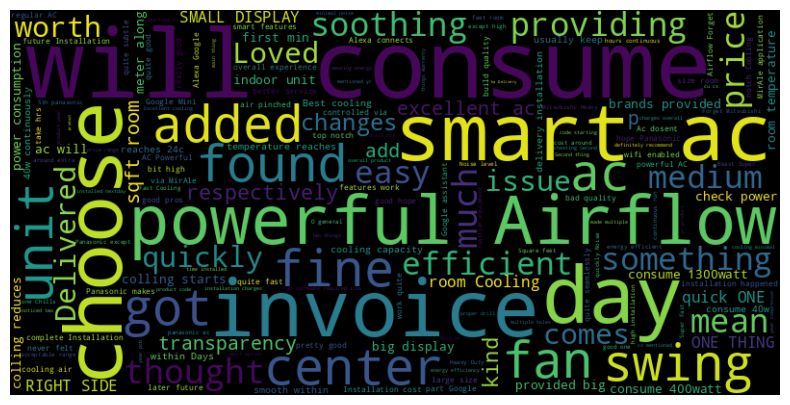

In [ ]:
#Step 5 : Extracting most postive words influencing the review and displying with wordcloud plot
#Identify the most common words used in the Positive reviews by creating a word cloud.

positive_reviews = df_reviews[df_reviews['Review Sentiment'] == 'Positive']['Review']
positive_text = ' '.join(positive_reviews)
positive_wordcloud = WordCloud(width=800, height=400).generate(positive_text)

plt.figure(figsize=(10, 5))
plt.imshow(positive_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

##Extracting Key Negative words and Plotting using wordcloud.
####This step gives the area of improvement as product or service to enhance product value.

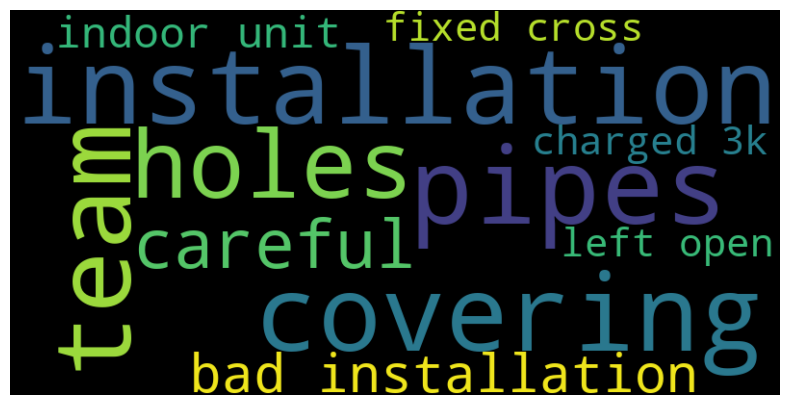

In [ ]:
#Step 6 : Extracting most negative words influencing the review and displying with wordcloud plot
#Identify the most common words used in the Negative reviews by creating a word cloud.
negative_reviews = df_reviews[df_reviews['Review Sentiment'] == 'Negative']['Review']
negative_text = ' '.join(negative_reviews)
negative_wordcloud = WordCloud(width=800, height=400).generate(negative_text)


plt.figure(figsize=(10, 5))
plt.imshow(negative_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

#**Topic extraction using NMF (Non-negative Matrix Factorization)**
######  To see what customers are talking about the most and what aspects of the product are influencing their opinions.

*   Pre-processing , tokenising and lemmatizing reviews

*   TF-IDF Vectorisation

*   Fitting the NMF model
*   Extracting Topics from NMF trained model


*   Tagging Topics to each review


*   Generate Word Frequencies



## Pre-processing , tokenising and lemmatizing reviews

In [ ]:
#Step 1 : Pre-processing , tokenising and lemmatizing
rev=df_reviews['Review']
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_review(review):
    # Convert to lowercase
    review = review.lower()
    # Tokenize review into words
    tokens = word_tokenize(review)
    # Remove stopwords
    tokens = [word for word in tokens if word not in stop_words]
    # Lemmatize words
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    # Join back tokens into string
    review = ' '.join(tokens)
    return review

##TF-IDF Vectorisation

In [ ]:
#Step 2 : Vectorisation of reviews
df_reviews['CleanReview'] = df_reviews['Review'].apply(preprocess_review)
revv=df_reviews['CleanReview']
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(list(reviews))


##Fitting the NMF model

In [ ]:
#Step 3 : Fitting the NMF model
num_topics = 200
model = NMF(n_components=num_topics, random_state=1)
model.fit(tfidf_matrix)

/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


NMF(n_components=500, random_state=1)

##Extracting Topics from NMF trained model

In [ ]:
#Step 4 : Getting topics using trained model
feature_names = vectorizer.get_feature_names_out()
topic_words = []
for topic_idx, topic in enumerate(model.components_):
    top_words = [feature_names[i] for i in topic.argsort()[:-6:-1]]
    topic_words.append(top_words)


##Tagging Topics to each review

In [ ]:
#Step 5 : Assign a topic to each review
topics = model.transform(tfidf_matrix)
review_topics = np.argmax(topics, axis=1)
df_topic = pd.DataFrame({'Review': revv, 'Topic': review_topics})
print('\nReview Topics:')
df_topic.head(-10)


Review Topics:


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


,Review,Topic
0,excellent ac 150 sqft room . cooling quick . o...,44
1,best cooling capacity product,31
2,delivery smooth within 5 day . day got deliver...,113
3,"ac quite good . really good pro , 1. panasonic...",17
4,ac dosent powerful airflow worth . powerful ac...,44
...,...,...
2195,"good one , chill 120 square foot room quickly ...",113
2196,bad installation team ... indoor unit fixed cr...,481
2197,"excellent cooling , minimal noise , amazing en...",157
2198,nice . go it👌,113


import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_18, *['Topic'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_19, *['Topic'], **{})
chart

In [ ]:
#Taking backup of the data
#df_topic.to_csv("panasonic_nmf.csv")
#df_reviews.to_csv("panasonic_updated.csv")

##Generate Word Frequencies

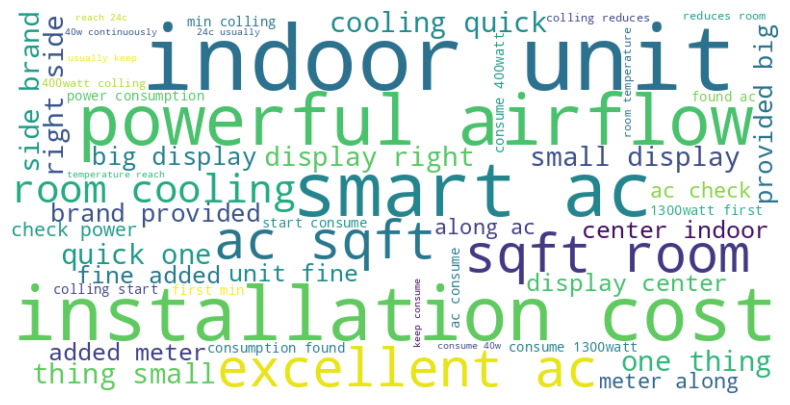

In [ ]:
#Generate word frequencies and create a word cloud
# Combine all clean reviews into a single string
all_reviews = ' '.join(df_topic['Review'])

# Generate word frequencies
wordcloud = WordCloud(width=800, height=400, max_words=50, background_color='white').generate(all_reviews)

# Display the generated word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# **Hypothesis on Product Reviews**.

*   Hypothesis 1: High-Rated Reviews Tend to Have More Upvotes.

*   Hypothesis 2: Longer Reviews Are More Likely to Be Positive.

*   Hypothesis 3: Reviews with Positive Sentiment Receive More Upvotes
*   Hypothesis 4: Certain words strongly influence the sentiment of product reviews.


*   Hypothesis 5: The location from which reviews are submitted influences the sentiment and ratings of product reviews.


*   Hypothesis 6: The time or season in which reviews are posted influences the sentiment and ratings of product reviews.



###Hypothesis 1: High-Rated Reviews Tend to Have More Upvotes.
*   Null Hypothesis (H0): The rating of a review does not significantly affect the number of upvotes.
*   Alternative Hypothesis (H1): Higher-rated reviews tend to receive more upvotes.




In [ ]:
#Satistical Significance
# Define the cutoff for high-rated reviews here it is 5
high_rating_cutoff = 5

# Split the data into two groups: high-rated and low-rated reviews
high_rated_reviews = df_reviews[df_reviews['Rating'] >= high_rating_cutoff]['Review Upvotes']
low_rated_reviews = df_reviews[df_reviews['Rating'] < high_rating_cutoff]['Review Upvotes']

# Perform a two-sample t-test to compare the means of upvotes between the two groups
t_statistic, p_value = stats.ttest_ind(high_rated_reviews, low_rated_reviews)
print(p_value)

# Set the significance level (alpha)
alpha = 0.049

# Check if the p-value is less than the significance level
if p_value < alpha:
    print("Reject the null hypothesis (H0)")
    print("Conclusion: There is a significant difference in upvotes between high-rated and low-rated reviews.")
else:
    print("Fail to reject the null hypothesis (H0)")
    print("Conclusion: There is no significant difference in upvotes between high-rated and low-rated reviews.")

3.201333790239295e-19
Reject the null hypothesis (H0)
Conclusion: There is a significant difference in upvotes between high-rated and low-rated reviews.


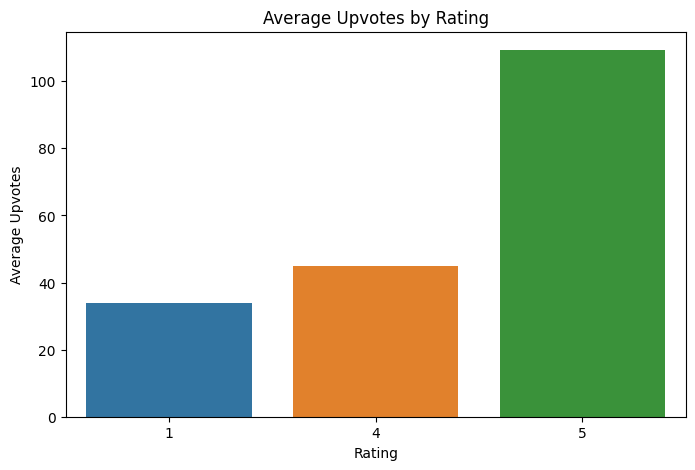

In [ ]:
# Group reviews by rating and calculate the mean upvotes for each rating
upvotes_by_rating = df_reviews.groupby('Rating')['Review Upvotes'].mean().reset_index()

# Visualize the data
plt.figure(figsize=(8, 5))
sns.barplot(x='Rating', y='Review Upvotes', data=upvotes_by_rating)
plt.xlabel('Rating')
plt.ylabel('Average Upvotes')
plt.title('Average Upvotes by Rating')
plt.show()

###Hypothesis 2: Longer Reviews Are More Likely to Be Positive.


*   Null Hypothesis (H0): The length of a review does not significantly affect its sentiment.
*   Alternative Hypothesis (H1): Longer reviews tend to be more positive.



In [ ]:
#Statistical Significance
# Define a threshold for what is considered a "long" review
review_length_threshold = 75

# Create two groups of reviews: longer reviews and shorter reviews
long_reviews = df_reviews[df_reviews['Review Length'] >= review_length_threshold]
short_reviews = df_reviews[df_reviews['Review Length'] < review_length_threshold]

# Perform a t-test to compare the sentiment scores of longer and shorter reviews
t_statistic, p_value = stats.ttest_ind(long_reviews['Sentiment Compund Score'], short_reviews['Sentiment Compund Score'])
print(p_value)
# Define the significance level (alpha)
alpha = 0.049

# Check if the p-value is less than the significance level
if p_value < alpha:
    print("Reject the null hypothesis (H0)")
    print("Longer reviews tend to have significantly higher sentiment scores (more positive).")
else:
    print("Fail to reject the null hypothesis (H0)")
    print("There is no significant difference in sentiment scores between longer and shorter reviews.")


2.590256478587552e-13
Reject the null hypothesis (H0)
Longer reviews tend to have significantly higher sentiment scores (more positive).


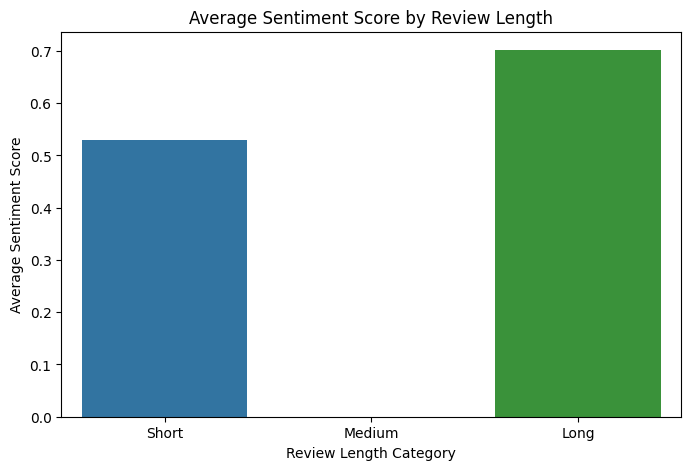

In [ ]:
# Calculate the average sentiment score for each review length category
df_reviews['Review Length Category'] = pd.cut(df_reviews['Review Length'], bins=[0,40,100, np.inf], labels=['Short','Medium', 'Long'])
sentiment_by_length = df_reviews.groupby('Review Length Category')['Sentiment Compund Score'].mean().reset_index()

# Visualize the data
plt.figure(figsize=(8, 5))
sns.barplot(x='Review Length Category', y='Sentiment Compund Score', data=sentiment_by_length)
plt.xlabel('Review Length Category')
plt.ylabel('Average Sentiment Score')
plt.title('Average Sentiment Score by Review Length')
plt.show()

##Hypothesis 3: Reviews with Positive Sentiment Receive More Upvotes.
*   Null Hypothesis (H0): The sentiment of a review does not significantly affect the number of upvotes.
*   Alternative Hypothesis (H1): Reviews with positive sentiment receive more upvotes.



In [ ]:
#Statistical Significance

# Define a threshold for what is considered positive sentiment
positive_sentiment_threshold = 0.2

# Create two groups of reviews: positive sentiment reviews and non-positive sentiment reviews
positive_sentiment_reviews = df_reviews[df_reviews['Sentiment Compund Score'] >= positive_sentiment_threshold]
non_positive_sentiment_reviews = df_reviews[df_reviews['Sentiment Compund Score'] < positive_sentiment_threshold]

# Perform a t-test to compare the number of upvotes between positive sentiment and non-positive sentiment reviews
t_statistic, p_value = stats.ttest_ind(positive_sentiment_reviews['Review Upvotes'], non_positive_sentiment_reviews['Review Upvotes'])
print(p_value)
# Define the significance level (alpha)
alpha = 0.049

# Check if the p-value is less than the significance level
if p_value < alpha:
    print("Reject the null hypothesis (H0)")
    print("Reviews with positive sentiment receive significantly more upvotes.")
else:
    print("Fail to reject the null hypothesis (H0)")
    print("There is no significant difference in upvotes between reviews with positive sentiment and non-positive sentiment reviews.")


1.7479778684715152e-07
Reject the null hypothesis (H0)
Reviews with positive sentiment receive significantly more upvotes.


/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:523: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, **kwds)


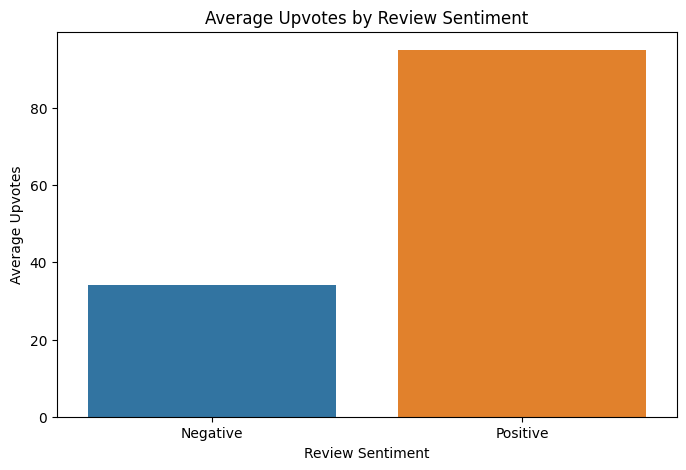

In [ ]:
# Group reviews by sentiment category and calculate the mean upvotes for each category
sentiment_upvotes = df_reviews.groupby('Review Sentiment')['Review Upvotes'].mean().reset_index()

# Visualize the data
plt.figure(figsize=(8, 5))
sns.barplot(x='Review Sentiment', y='Review Upvotes', data=sentiment_upvotes)
plt.xlabel('Review Sentiment')
plt.ylabel('Average Upvotes')
plt.title('Average Upvotes by Review Sentiment')
plt.show()

##Hypothesis 4: Certain words strongly influence the sentiment of product reviews.

*   Null Hypothesis (H0): The choice of words does not significantly affect the sentiment of product reviews.
*   Alternative Hypothesis (H1): Specific words significantly influence the sentiment of product reviews.







In [ ]:
#Statistical Significance

specific_words = ["excellent", "amazing", "satiesfied","worthless","power consumption","installation"]

# Create two groups of reviews: reviews containing specific words and reviews not containing specific words
reviews_with_specific_words = df_reviews[df_reviews['CleanReview'].str.contains('|'.join(specific_words), case=False, na=False)]
reviews_without_specific_words = df_reviews[~df_reviews['CleanReview'].str.contains('|'.join(specific_words), case=False, na=False)]

# Perform a t-test to compare the sentiment scores between the two groups
t_statistic, p_value = stats.ttest_ind(reviews_with_specific_words['Sentiment Compund Score'], reviews_without_specific_words['Sentiment Compund Score'])
print(p_value)
# Define the significance level (alpha)
alpha = 0.05

# Check if the p-value is less than the significance level
if p_value < alpha:
    print("Reject the null hypothesis (H0)")
    print("Specific words significantly influence the sentiment of product reviews.")
else:
    print("Fail to reject the null hypothesis (H0)")
    print("There is no significant difference in sentiment scores between reviews containing specific words and reviews not containing specific words.")


4.141684426655986e-09
Reject the null hypothesis (H0)
Specific words significantly influence the sentiment of product reviews.


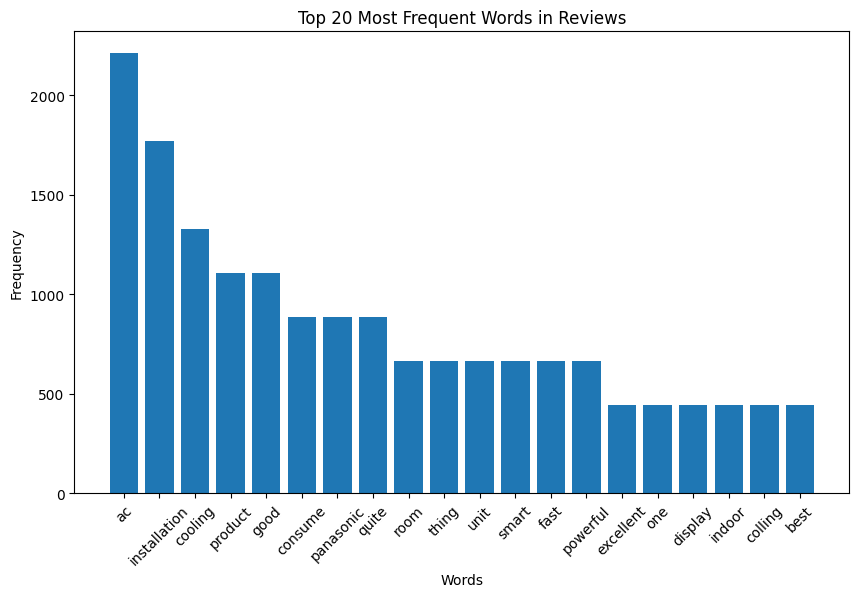

In [ ]:
corpus = ' '.join(df_reviews['Review'])
words = nltk.word_tokenize(corpus)
stop_words = set(stopwords.words('english'))
filtered_words = [word.lower() for word in words if word.isalpha() and word.lower() not in stop_words]

# Create a frequency distribution of words
word_freq = Counter(filtered_words)

# Get the top N most frequent words
top_words_count = 20
top_words = word_freq.most_common(top_words_count)

# Visualize the top words and their frequencies
plt.figure(figsize=(10, 6))
plt.bar(*zip(*top_words))
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title(f'Top {top_words_count} Most Frequent Words in Reviews')
plt.xticks(rotation=45)
plt.show()

##Hypothesis 5: The location from which reviews are submitted influences the sentiment and ratings of product reviews.

*   Null Hypothesis (H0): The location from which reviews are submitted has no significant influence on the sentiment and ratings of product reviews.
*   Alternative Hypothesis (H1): The location from which reviews are submitted significantly influences the sentiment and ratings of product reviews.


In [ ]:
#Statistical Significance

#Create a list of reviewing locations you want to compare
reviewing_locations = df_reviews['Reviewing Location'].unique()

# Define significance levels
alpha = 0.049

# Test hypothesis for sentiment scores
for location in reviewing_locations:
    # Create two groups: reviews from the current location and reviews from all other locations
    reviews_from_location = df_reviews[df_reviews['Reviewing Location'] == location]
    reviews_from_other_locations = df_reviews[df_reviews['Reviewing Location'] != location]

    # Perform a t-test to compare sentiment scores between the two groups
    t_statistic, p_value = stats.ttest_ind(reviews_from_location['Sentiment Compund Score'], reviews_from_other_locations['Sentiment Compund Score'])
    print(p_value)
    # Check if the p-value is less than alpha
    if p_value < alpha:
        print(f"Reject the null hypothesis (H0) for location '{location}'")
        print(f"The location '{location}' significantly influences sentiment scores.")
    else:
        print(f"Fail to reject the null hypothesis (H0) for location '{location}'")
        print(f"The location '{location}' does not significantly influence sentiment scores.")


1.3787624922164889e-05
Reject the null hypothesis (H0) for location 'Nandivaram Guduvancheri'
The location 'Nandivaram Guduvancheri' significantly influences sentiment scores.
0.2879371618950765
Fail to reject the null hypothesis (H0) for location 'Pakbara'
The location 'Pakbara' does not significantly influence sentiment scores.
2.0831266052947016e-23
Reject the null hypothesis (H0) for location 'Medinipur'
The location 'Medinipur' significantly influences sentiment scores.
3.617273107237694e-28
Reject the null hypothesis (H0) for location 'Kolkata'
The location 'Kolkata' significantly influences sentiment scores.
2.4965946935389106e-17
Reject the null hypothesis (H0) for location 'Amritsar'
The location 'Amritsar' significantly influences sentiment scores.
3.0988648764812164e-16
Reject the null hypothesis (H0) for location 'Thane'
The location 'Thane' significantly influences sentiment scores.
0.0
Reject the null hypothesis (H0) for location 'Bengaluru'
The location 'Bengaluru' signi

/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:523: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, **kwds)


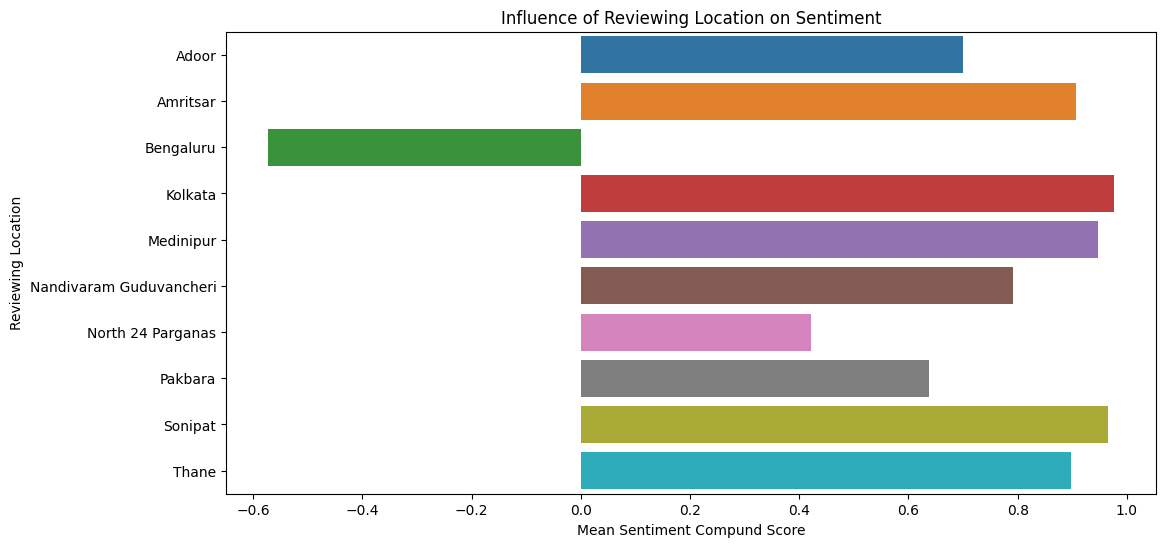

In [ ]:
# Group reviews by "Reviewing Location" and calculate the mean sentiment compound score
location_sentiment = df_reviews.groupby('Reviewing Location')['Sentiment Compund Score'].mean().reset_index()

# Visualize the data
plt.figure(figsize=(12, 6))
sns.barplot(x='Sentiment Compund Score', y='Reviewing Location', data=location_sentiment)
plt.xlabel('Mean Sentiment Compund Score')
plt.ylabel('Reviewing Location')
plt.title('Influence of Reviewing Location on Sentiment')
plt.show()

##Hypothesis 6: The time or season in which reviews are posted influences the sentiment and ratings of product reviews.

*   Null Hypothesis (H0): The review date has no significant influence on the sentiment and ratings of product reviews.
*   Alternative Hypothesis (H1): The review date significantly influences the sentiment and ratings of product reviews.






In [ ]:
#Statastical Significance

# Extract year and month from the "Review Date" column
df_reviews['Year'] = pd.to_datetime(df_reviews['Review Date']).dt.year
df_reviews['Month'] = pd.to_datetime(df_reviews['Review Date']).dt.month

# Define significance levels
alpha = 0.05

# Test hypothesis for sentiment scores
for year in df_reviews['Year'].unique():
    # Create two groups: reviews from the current year and reviews from all other years
    reviews_from_year = df_reviews[df_reviews['Year'] == year]
    reviews_from_other_years = df_reviews[df_reviews['Year'] != year]

    # Perform a t-test to compare sentiment scores between the two groups
    t_statistic, p_value = stats.ttest_ind(reviews_from_year['Sentiment Compund Score'], reviews_from_other_years['Sentiment Compund Score'])

    # Check if the p-value is less than alpha
    if p_value < alpha:
        print(f"Reject the null hypothesis (H0) for year {year}")
        print(f"The year {year} significantly influences sentiment scores.")
    else:
        print(f"Fail to reject the null hypothesis (H0) for year {year}")
        print(f"The year {year} does not significantly influence sentiment scores.")

# Test hypothesis for ratings using ANOVA
# You can use ANOVA to compare ratings across different years or months
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Create a model to perform ANOVA on ratings by year
model = ols('Rating ~ C(Year)', data=df_reviews).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

# Check the p-value from ANOVA
p_value = anova_table['PR(>F)'][0]

# Check if the p-value is less than alpha
if p_value < alpha:
    print("\nReject the null hypothesis (H0) for ratings")
    print("The review year significantly influences ratings.")
else:
    print("\nFail to reject the null hypothesis (H0) for ratings")
    print("The review year does not significantly influence ratings.")

Reject the null hypothesis (H0) for year 2022
The year 2022 significantly influences sentiment scores.
Reject the null hypothesis (H0) for year 2021
The year 2021 significantly influences sentiment scores.
Fail to reject the null hypothesis (H0) for year 2023
The year 2023 does not significantly influence sentiment scores.

Reject the null hypothesis (H0) for ratings
The review year significantly influences ratings.


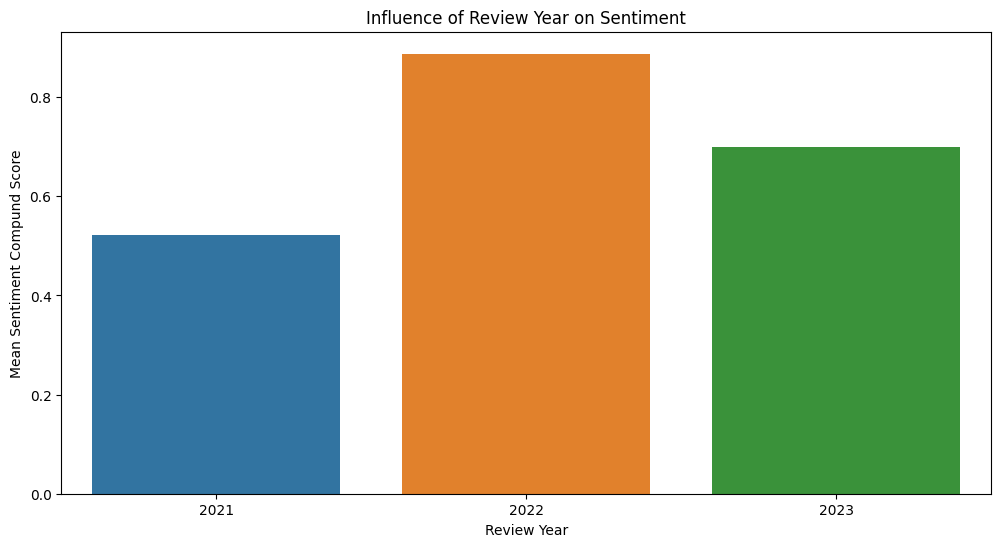

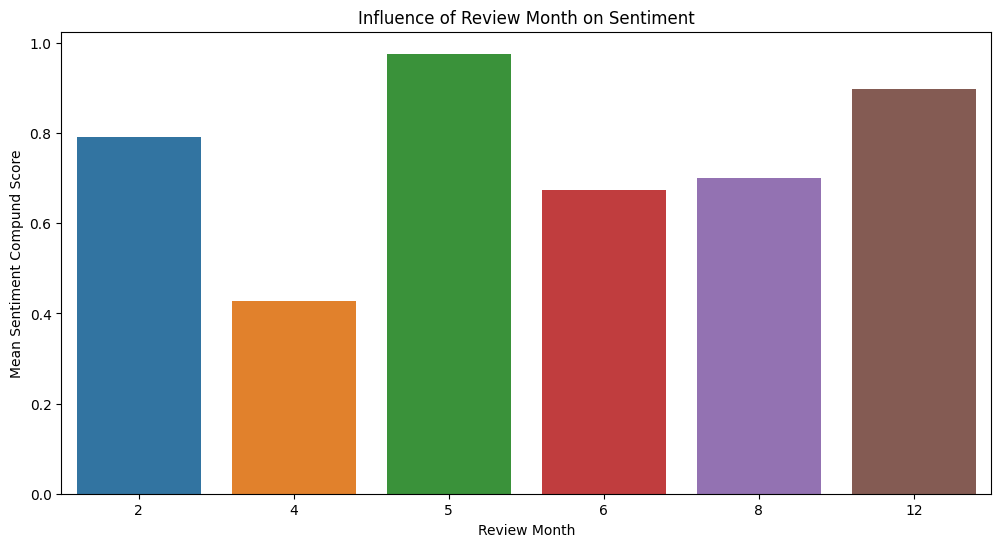

In [ ]:
# Extract the year and month from the "Review Date" column
df_reviews['Review Year'] = pd.to_datetime(df_reviews['Review Date']).dt.year
df_reviews['Review Month'] = pd.to_datetime(df_reviews['Review Date']).dt.month

# Group reviews by "Review Year" and calculate the mean sentiment compound score
year_sentiment = df_reviews.groupby('Review Year')['Sentiment Compund Score'].mean().reset_index()

# Group reviews by "Review Month" and calculate the mean sentiment compound score
month_sentiment = df_reviews.groupby('Review Month')['Sentiment Compund Score'].mean().reset_index()

# Visualize the data for review sentiment by year
plt.figure(figsize=(12, 6))
sns.barplot(x='Review Year', y='Sentiment Compund Score', data=year_sentiment)
plt.xlabel('Review Year')
plt.ylabel('Mean Sentiment Compund Score')
plt.title('Influence of Review Year on Sentiment')
plt.show()

# Visualize the data for review sentiment by month
plt.figure(figsize=(12, 6))
sns.barplot(x='Review Month', y='Sentiment Compund Score', data=month_sentiment)
plt.xlabel('Review Month')
plt.ylabel('Mean Sentiment Compund Score')
plt.title('Influence of Review Month on Sentiment')
plt.show()

#**Conclusion**

*   **Customer Satisfaction**: You have identified that a product with 85% positive and 15% negative reviews suggests that 15% of customers are not happy with the product and after-sales services. This highlights the need for improving customer satisfaction.

*   **Positive Word Cloud**: The positive word cloud analysis has helped identify the top words that can be used as selling points for the product. This information can be valuable for advertising, informing sales personnel, and guiding future product design.

*   **Negative Word Cloud**: The negative word cloud analysis has highlighted areas of improvement, such as power consumption and installation services. Addressing these concerns can lead to a better customer experience.
*   **Topic Generation**: Extracting topics from the reviews provides insights into customer ideas, knowledge about the product, and concerns. This information can guide product development and customer support strategies.


*   **Turning Non-Positive Reviewers into Potential Customers**: Identifying non-positive reviewers as potential future customers and targeting them with campaigns and improvements can help move towards product perfection and enhance customer loyalty.


*   **Hypothesis Testing**: Your use of hypothesis testing provides both graphical and statistical significance to support your conclusions and goals. This rigorous approach ensures that your insights are based on solid evidence.









